In [1]:
import sys, os, h5py
import numpy as np
import pandas as pd
from numpy import genfromtxt 
import nibabel as nb
import matplotlib.pyplot as plt
import seaborn as sns
from brainspace.mesh import mesh_elements
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
from brainstat.mesh.data import mesh_smooth
import plot_funcs
import warnings
warnings.filterwarnings("ignore")


### load gradients of hippocampal-isocortical functional connectivity (fc)

In [2]:
ddir = '../data/tout_group/'

# read-in primary and seconardy gradients (G1 & G2) for individual subfields
h1  = h5py.File(os.path.join(ddir, 'Hmean709connGradients_left.h5'), 'r');

G1_fc_LSUB = np.array(h1['gradients_'][0:1024,0])
G1_fc_LCA = np.array(h1['gradients_'][1024:1024+2048,0])
G1_fc_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,0])

G2_fc_LSUB = np.array(h1['gradients_'][0:1024,1])
G2_fc_LCA = np.array(h1['gradients_'][1024:1024+2048,1])
G2_fc_LDG = np.array(h1['gradients_'][1024+2048:1024+2048+1024,1])


## G1 (fc)

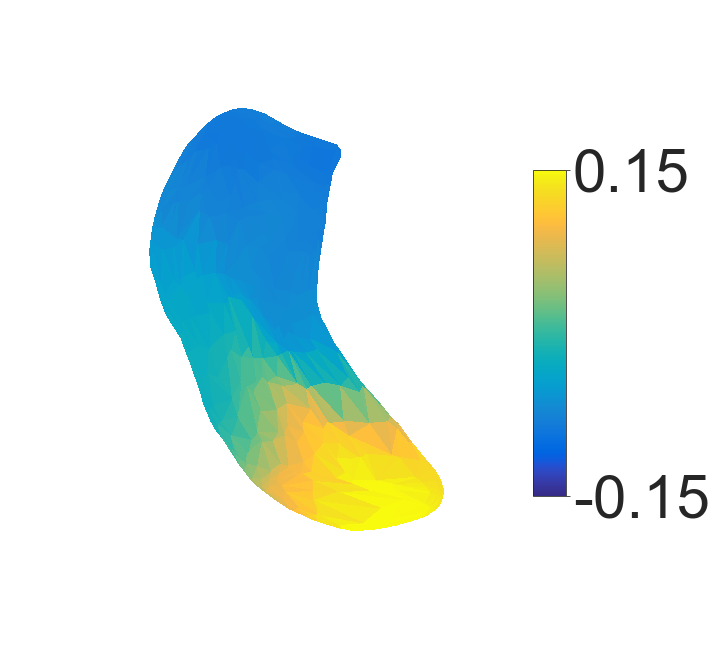

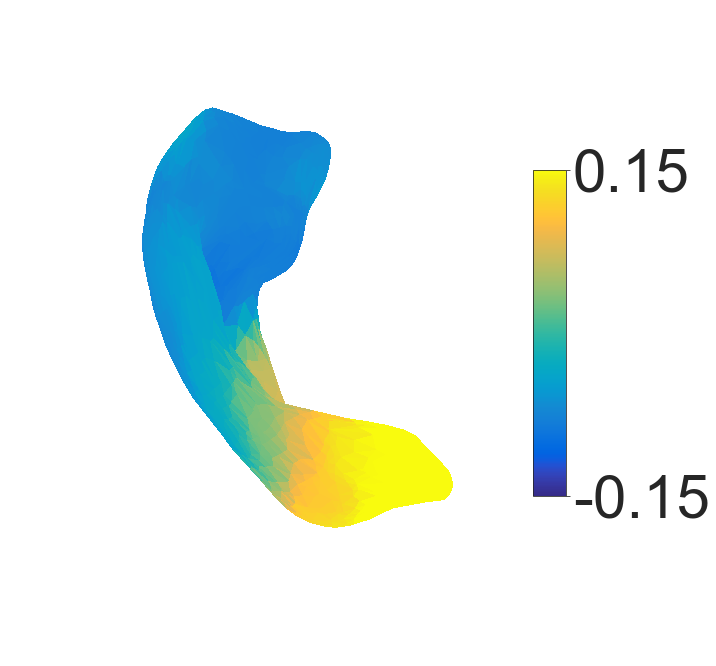

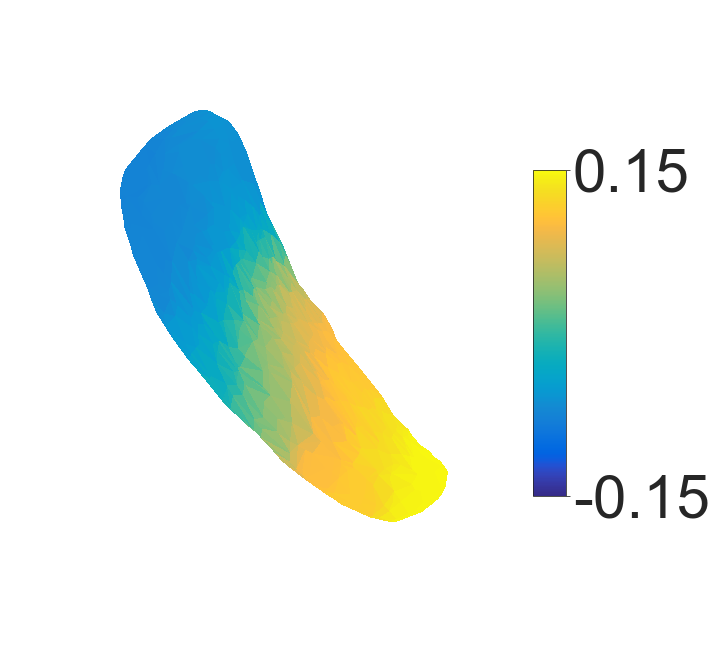

In [3]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   G1_fc_LSUB,
                                   plot_funcs.parula_cmap(),
                                   -0.15, 0.15)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   G1_fc_LCA,
                                   plot_funcs.parula_cmap(),
                                   -0.15, 0.15)


fig3 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   G1_fc_LDG,
                                   plot_funcs.parula_cmap(),
                                   -0.15, 0.15)


## G2 (fc)

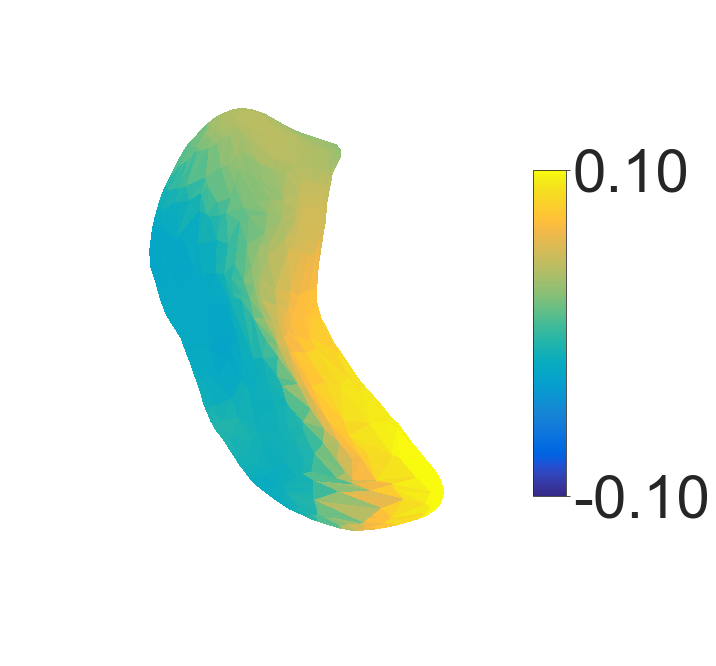

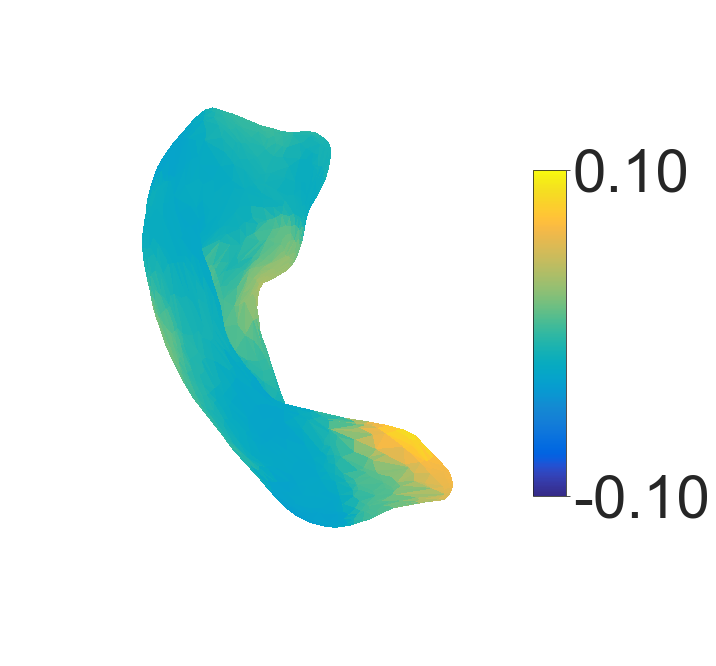

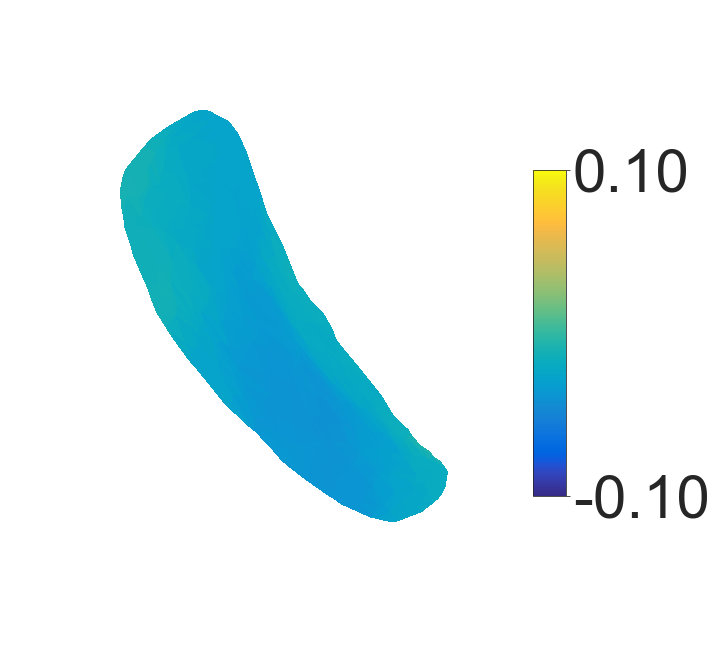

In [4]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   G2_fc_LSUB,
                                   plot_funcs.parula_cmap(),
                                   -0.1, 0.1)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   G2_fc_LCA,
                                   plot_funcs.parula_cmap(),
                                   -0.1, 0.1)


fig3 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   G2_fc_LDG,
                                   plot_funcs.parula_cmap(),
                                   -0.1, 0.1)


## cortical projections of primary fc gradient (G1 (fc))


In [5]:
gdir = '../data/tout_group/'

fcfile = os.path.join(gdir, 'Hmean709_FC_left.h5')
f = h5py.File(fcfile, 'r')
fcon_LSUB = np.array(f['data'][0:1024,:])
fcon_LCA  = np.array(f['data'][1024:1024+2048,:])
fcon_LDG  = np.array(f['data'][1024+2048:1024+1024+2048,:])

fcon_LSUB.shape, fcon_LCA.shape, fcon_LDG.shape


((1024, 360), (2048, 360), (1024, 360))

In [6]:
# correlations between G1 (fc) of subfields and subfield-isocortex fc

r1_LSUB = np.zeros((360,))
r1_LCA  = np.zeros((360,))
r1_LDG = np.zeros((360,))

for k in range(0, 360):
    r1_LSUB[k] = np.corrcoef(fcon_LSUB.T[k,:], G1_fc_LSUB)[-1:,:-1][0,0]
    r1_LCA[k]  = np.corrcoef(fcon_LCA.T[k,:], G1_fc_LCA)[-1:,:-1][0,0]
    r1_LDG[k]  = np.corrcoef(fcon_LDG.T[k,:], G1_fc_LDG)[-1:,:-1][0,0]
    


In [7]:
print(r1_LSUB.min(), r1_LSUB.max())
print(r1_LCA.min(), r1_LCA.max())
print(r1_LDG.min(), r1_LDG.max())

-0.6627045936642031 0.9532406652433135
-0.5390373179138189 0.9522693431991096
-0.47215788094816474 0.9657078291449915


### load surf data to plot..

In [8]:
# surfaces
surf_lh, surf_rh = load_conte69()

# labeling
labeling_file = '../data/tout_group/glasser.csv' 
labeling = genfromtxt(labeling_file)

# medial wall mask
mask = labeling != 0 
mymask = np.ones((64984,)).astype('bool')
mymask[np.where(mask == False)[0]] = False
mymask[np.where(mask == False)[0] + 32492] = False

In [9]:
# map r-values to the isocortex

r1_LSUB_labeled = map_to_labels(r1_LSUB, labeling, mask=mymask) 
r1_LSUB_labeled[np.where(mymask == False)] = np.nan

r1_LCA_labeled = map_to_labels(r1_LCA, labeling, mask=mymask) 
r1_LCA_labeled[np.where(mymask == False)] = np.nan


r1_LDG_labeled = map_to_labels(r1_LDG, labeling, mask=mymask) 
r1_LDG_labeled[np.where(mymask == False)] = np.nan


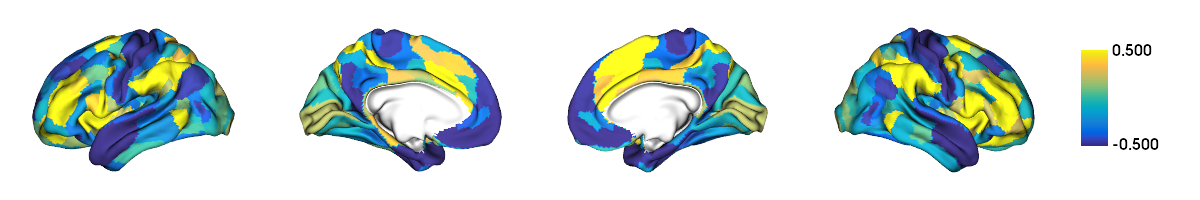

In [10]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = r1_LSUB_labeled,
                 nan_color = (0.9,0.9,0.9,1), size = (1200, 200), cmap = plot_funcs.parula_cmap(),
                 color_bar = True, color_range = (-0.5, 0.5),
                 interactive = False, zoom = 1.3, embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/r1_G1_FCON_LSUB.svg'
                 )

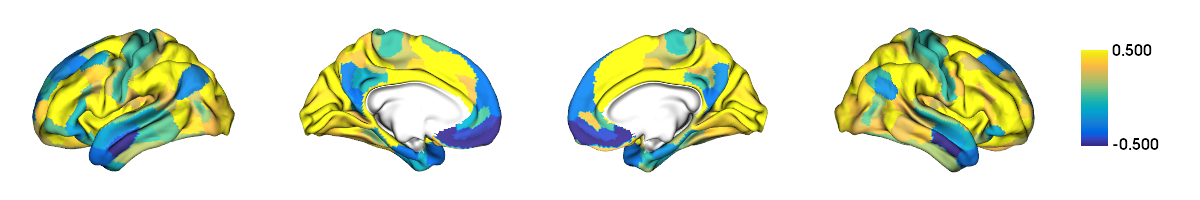

In [11]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = r1_LCA_labeled,
                 nan_color = (0.9,0.9,0.9,1), size = (1200, 200), cmap = plot_funcs.parula_cmap(),
                 color_bar = True, color_range = (-0.5, 0.5),
                 interactive = False, zoom = 1.3, embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/r1_G1_FCON_LCA.svg'
                )

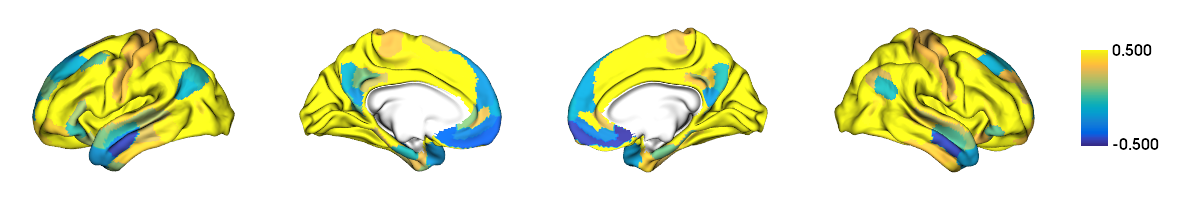

In [12]:
plot_hemispheres(surf_lh, surf_rh, 
                 array_name = r1_LDG_labeled,
                 nan_color = (0.9,0.9,0.9,1), size = (1200, 200), cmap = plot_funcs.parula_cmap(),
                 color_bar = True, color_range = (-0.5, 0.5),
                 interactive = False, zoom = 1.3, embed_nb = True,
                 #screenshot = True,
                 #filename = '../figures/r1_G1_FCON_LDG.svg'                
                )

## Gradients of hippocampal-isocrotical mean-fc-heritability


In [13]:
# read-in data: gradients of fc-heritability for subfields
h = h5py.File('../data/tout_group/Hmean709_FC_herit_gradients_left.h5', 'r')

G1_herit_LSUB = np.array(h['gradients'][0:1024,0])
G1_herit_LCA = np.array(h['gradients'][1024:1024+2048,0])
G1_herit_LDG = np.array(h['gradients'][1024+2048:1024+2048+1024,0])

G2_herit_LSUB = np.array(h['gradients'][0:1024,1])
G2_herit_LCA = np.array(h['gradients'][1024:1024+2048,1])
G2_herit_LDG = np.array(h['gradients'][1024+2048:1024+2048+1024,1])


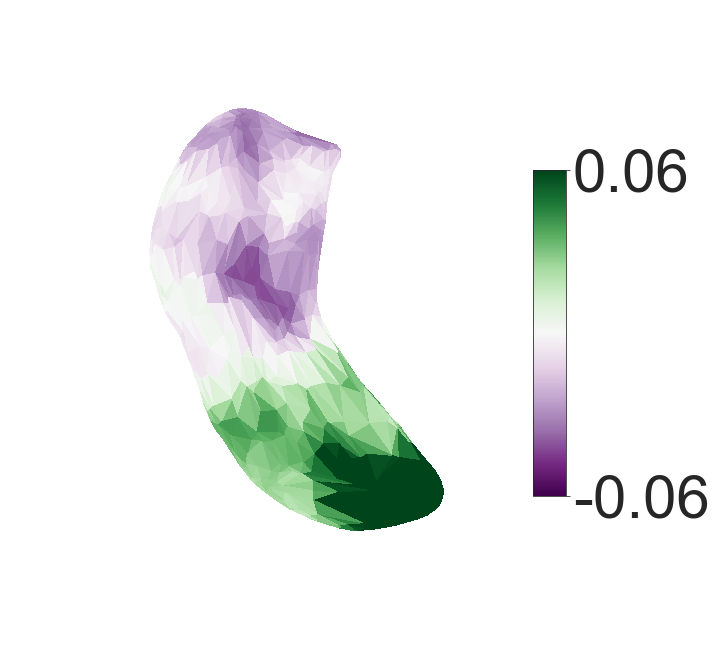

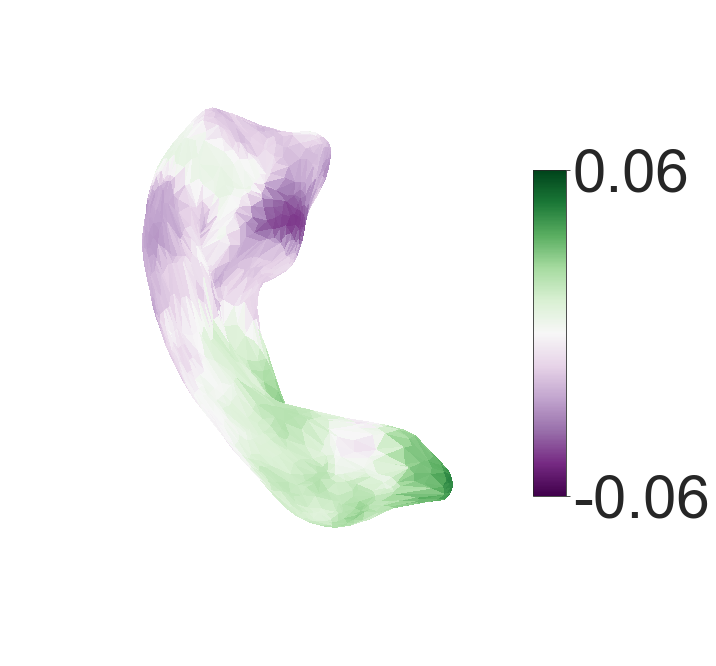

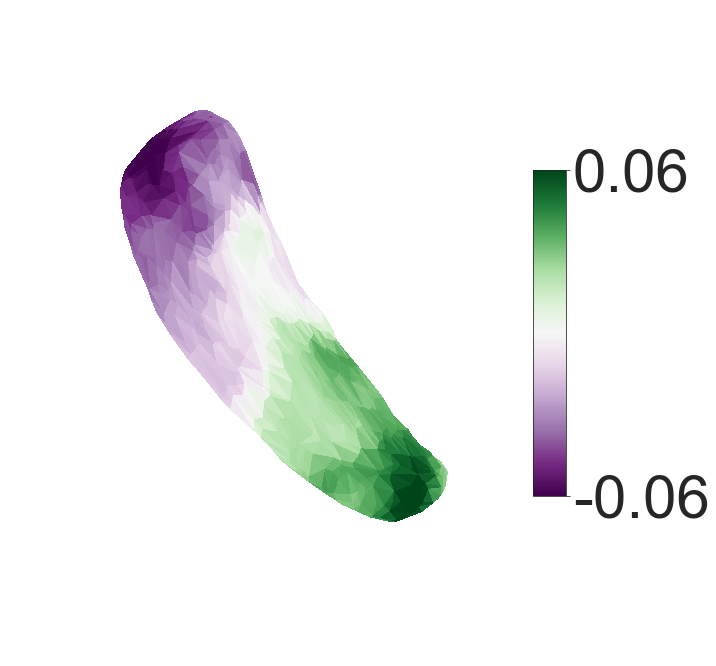

In [14]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  G1_herit_LSUB, 'PRGn', -0.06, 0.06)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   G1_herit_LCA, 'PRGn', -0.06, 0.06)

fig3 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   G1_herit_LDG, 'PRGn', -0.06, 0.06)


#fig1.savefig('../figures/FC_herit_G1_lsub.svg', dpi=300)
#fig2.savefig('../figures/FC_herit_G1_lca.svg', dpi=300)
#fig3.savefig('../figures/FC_herit_G1_ldg.svg', dpi=300)



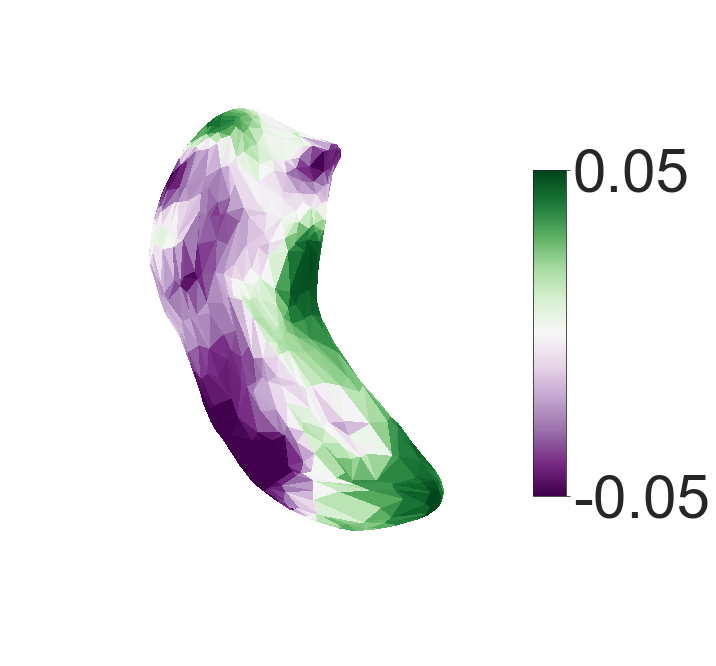

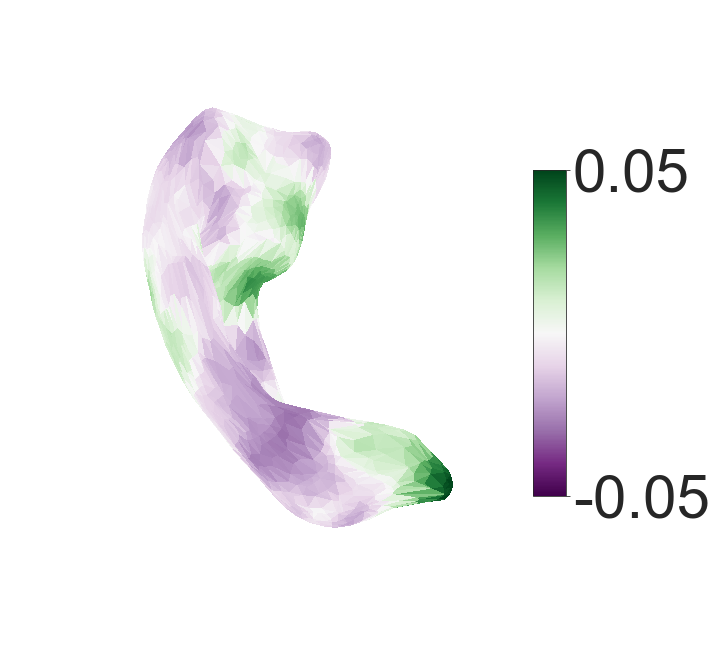

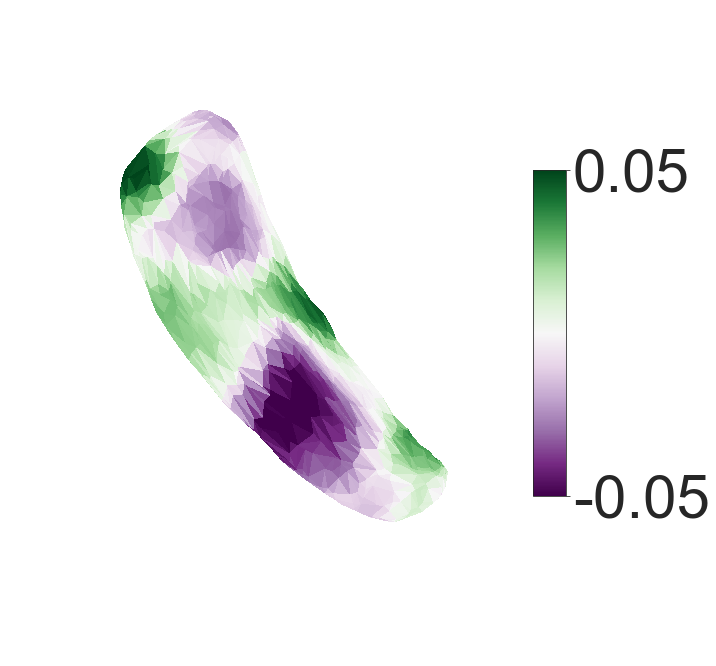

In [15]:
fig1 = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                  plot_funcs.yLSUB, 
                                  plot_funcs.zLSUB, 
                                  plot_funcs.triLSUB, 
                                  G2_herit_LSUB, 'PRGn', -0.05, 0.05)

fig2 = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   G2_herit_LCA, 'PRGn', -0.05, 0.05)

fig3 = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, 
                                   plot_funcs.yLDG, 
                                   plot_funcs.zLDG, 
                                   plot_funcs.triLDG, 
                                   G2_herit_LDG, 'PRGn', -0.05, 0.05)

#fig1.savefig('../figures/FC_herit_G2_lsub.svg', dpi=300)
#fig2.savefig('../figures/FC_herit_G2_lca.svg', dpi=300)
#fig3.savefig('../figures/FC_herit_G2_ldg.svg', dpi=300)


## Heritability of subfield (fc) gradients

### SUB : heritability of G1 (fc)

In [16]:
# read-in heritability scores computed for 1024 SUB vertices
# we'll have 1024 nodes in data frame
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

# file name of the solar output for SUB
fnameLSUB = '../solar/FC_G1_LSUB/G1_LSUB_results_herit.txt'

# read in solar output
herit_g1_LSUB = pd.read_csv(fnameLSUB, index_col = 0, header = 0)
herit_g1_LSUB.index.name = 'node'

# sort it from node 1 ... node 1024
df_herit_g1_LSUB = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lsub+1):

    iA = herit_g1_LSUB.index.get_loc(nodeID)
    iB = df_herit_g1_LSUB.index.get_loc(nodeID)

    df_herit_g1_LSUB.iloc[iB]['H2r'] = herit_g1_LSUB.iloc[iA]['H2r']
    df_herit_g1_LSUB.iloc[iB]['rp']  = herit_g1_LSUB.iloc[iA]['rp']

sorted_herit_g1_LSUB = np.array(df_herit_g1_LSUB['H2r'], dtype = 'float')

sorted_herit_g1_LSUB.min(), sorted_herit_g1_LSUB.max(), sorted_herit_g1_LSUB.mean()


1024


(0.0, 0.28563790000000006, 0.13555392880859374)

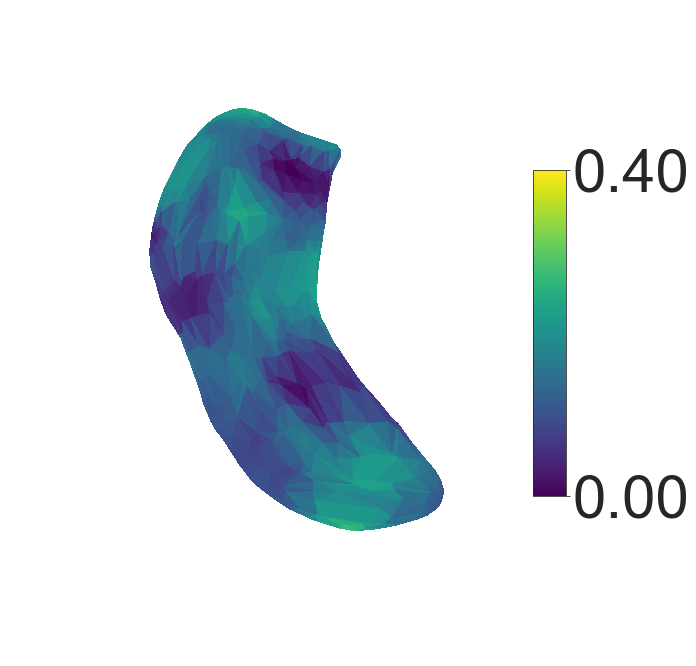

In [17]:
fig1  = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, plot_funcs.yLSUB, plot_funcs.zLSUB, plot_funcs.triLSUB, 
                                   sorted_herit_g1_LSUB, 'viridis', 0, 0.40)

#fig1.savefig('../figures/FC_G1_LSUB_herit.svg', dpi=300)

### SUB : heritability of G2 (fc)

In [18]:
fnameLSUB = '../solar/FC_G2_LSUB/G2_LSUB_results_herit.txt'

herit_g2_LSUB = pd.read_csv(fnameLSUB, index_col = 0, header = 0)
herit_g2_LSUB.index.name = 'node'

df_herit_g2_LSUB = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lsub+1):

    iA = herit_g2_LSUB.index.get_loc(nodeID)
    iB = df_herit_g2_LSUB.index.get_loc(nodeID)

    df_herit_g2_LSUB.iloc[iB]['H2r'] = herit_g2_LSUB.iloc[iA]['H2r']
    df_herit_g2_LSUB.iloc[iB]['rp']  = herit_g2_LSUB.iloc[iA]['rp']

sorted_herit_g2_LSUB = np.array(df_herit_g2_LSUB['H2r'], dtype = 'float')

np.nanmin(sorted_herit_g2_LSUB), np.nanmax(sorted_herit_g2_LSUB), np.nanmean(sorted_herit_g2_LSUB)


(0.0, 0.2960134, 0.08938746673189825)

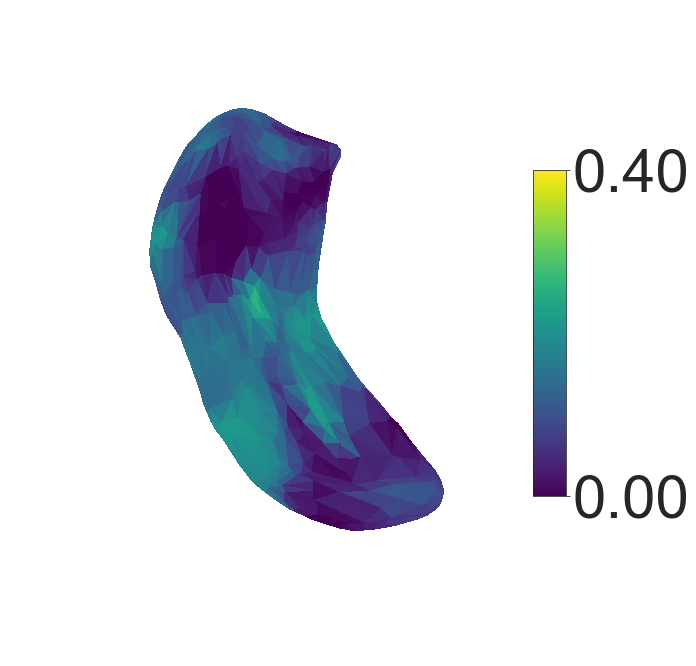

In [19]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, plot_funcs.yLSUB, plot_funcs.zLSUB,
                                   plot_funcs.triLSUB, 
                                   sorted_herit_g2_LSUB, 'viridis', 0, 0.40)

#fig.savefig('../figures/FC_G2_LSUB_herit.svg', dpi=300)

### LCA : heritability of G1 (fc)

In [20]:
tot_node_num_lca = 2048
node_str = []
for i in range(1, tot_node_num_lca+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]


2048


(1, '...', 2048)

In [21]:
fnameLCA = '../solar/FC_G1_LCA/G1_LCA_results_herit.txt'

herit_g1_LCA = pd.read_csv(fnameLCA, index_col = 0, header = 0)
herit_g1_LCA.index.name = 'node'

df_herit_g1_LCA = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lca+1):

    iA = herit_g1_LCA.index.get_loc(nodeID)
    iB = df_herit_g1_LCA.index.get_loc(nodeID)

    df_herit_g1_LCA.iloc[iB]['H2r'] = herit_g1_LCA.iloc[iA]['H2r']
    df_herit_g1_LCA.iloc[iB]['rp']  = herit_g1_LCA.iloc[iA]['rp']

sorted_herit_g1_LCA = np.array(df_herit_g1_LCA['H2r'], dtype = 'float')

np.nanmin(sorted_herit_g1_LCA), np.nanmax(sorted_herit_g1_LCA), np.nanmean(sorted_herit_g1_LCA)


(0.0, 0.320065, 0.0820988623655914)

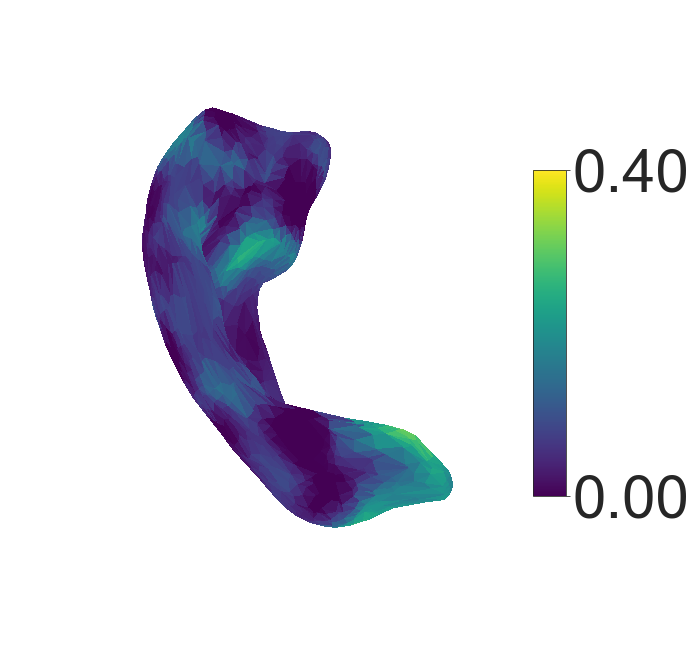

In [22]:
fig2  = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, plot_funcs.yLCA, plot_funcs.zLCA, plot_funcs.triLCA, 
                                   sorted_herit_g1_LCA, 'viridis', 0, 0.40)

#fig2.savefig('../figures/FC_G1_LCA_herit.svg', dpi=300)

### LCA : heritability of G2 (fc)

In [23]:
fnameLCA = '../solar/FC_G2_LCA/G2_LCA_results_herit.txt'

herit_g2_LCA = pd.read_csv(fnameLCA, index_col = 0, header = 0)
herit_g2_LCA.index.name = 'node'

df_herit_g2_LCA = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lca+1):

    iA = herit_g2_LCA.index.get_loc(nodeID)
    iB = df_herit_g2_LCA.index.get_loc(nodeID)

    df_herit_g2_LCA.iloc[iB]['H2r'] = herit_g2_LCA.iloc[iA]['H2r']
    df_herit_g2_LCA.iloc[iB]['rp']  = herit_g2_LCA.iloc[iA]['rp']

sorted_herit_g2_LCA = np.array(df_herit_g2_LCA['H2r'], dtype = 'float')

np.nanmin(sorted_herit_g2_LCA), np.nanmax(sorted_herit_g2_LCA), np.nanmean(sorted_herit_g2_LCA)



(0.0, 0.3893543, 0.06310438117359414)

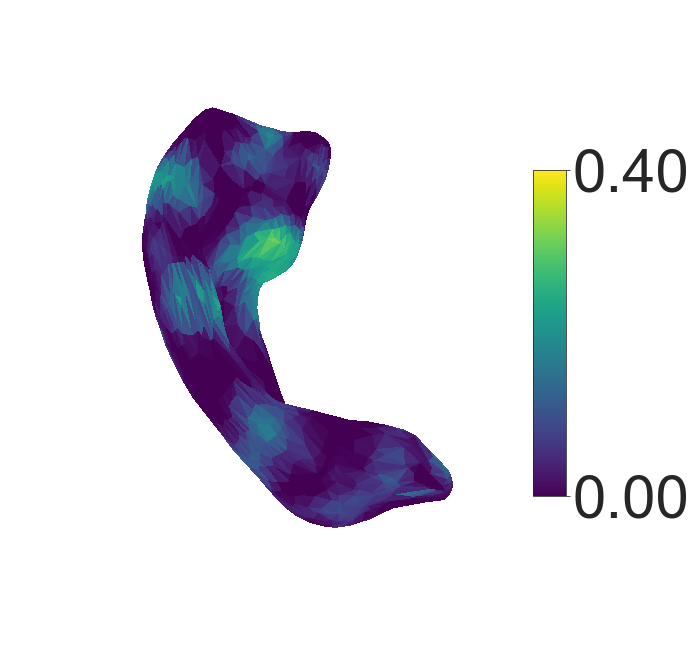

In [24]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, plot_funcs.yLCA, plot_funcs.zLCA, plot_funcs.triLCA, 
                                   sorted_herit_g2_LCA, 'viridis', 0, 0.40)

#fig.savefig('../figures/FC_G2_LCA_herit.svg', dpi=300)

### LDG : heritability of G1 (fc)

In [25]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]


1024


(1, '...', 1024)

In [26]:
fnameLDG = '../solar/FC_G1_LDG/G1_LDG_results_herit.txt'

herit_g1_LDG = pd.read_csv(fnameLDG, index_col = 0, header = 0)
herit_g1_LDG.index.name = 'node'

df_herit_g1_LDG = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lsub+1):

    iA = herit_g1_LDG.index.get_loc(nodeID)
    iB = df_herit_g1_LDG.index.get_loc(nodeID)

    df_herit_g1_LDG.iloc[iB]['H2r'] = herit_g1_LDG.iloc[iA]['H2r']
    df_herit_g1_LDG.iloc[iB]['rp']  = herit_g1_LDG.iloc[iA]['rp']

sorted_herit_g1_LDG = np.array(df_herit_g1_LDG['H2r'], dtype = 'float')

np.nanmin(sorted_herit_g1_LDG), np.nanmax(sorted_herit_g1_LDG), np.nanmean(sorted_herit_g1_LDG)


(0.0, 0.2689812, 0.05328462820763957)

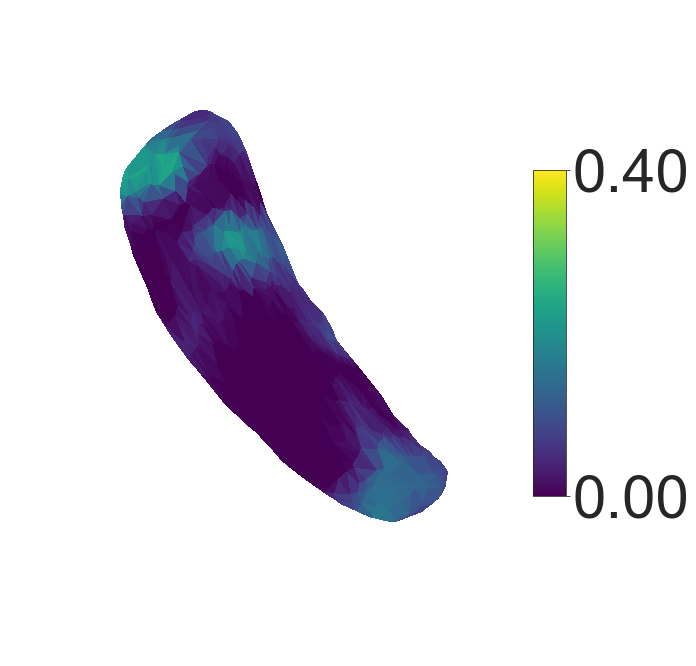

In [27]:
fig3  = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, plot_funcs.yLDG, plot_funcs.zLDG, plot_funcs.triLDG, 
                                   sorted_herit_g1_LDG, 'viridis', 0, 0.40)

#fig3.savefig('../figures/FC_G1_LDG_herit.svg', dpi=300)

### LDG : heritability of G2 (fc)

In [28]:
fnameLDG = '../solar/FC_G2_LDG/G2_LDG_results_herit.txt'

herit_g2_LDG = pd.read_csv(fnameLDG, index_col = 0, header = 0)
herit_g2_LDG.index.name = 'node'

df_herit_g2_LDG = pd.DataFrame(index = node_str, columns = ['H2r', 'rp'])

for nodeID in range(1, tot_node_num_lsub+1):

    iA = herit_g2_LDG.index.get_loc(nodeID)
    iB = df_herit_g2_LDG.index.get_loc(nodeID)

    df_herit_g2_LDG.iloc[iB]['H2r'] = herit_g2_LDG.iloc[iA]['H2r']
    df_herit_g2_LDG.iloc[iB]['rp']  = herit_g2_LDG.iloc[iA]['rp']

sorted_herit_g2_LDG = np.array(df_herit_g2_LDG['H2r'], dtype = 'float')

np.nanmin(sorted_herit_g2_LDG), np.nanmax(sorted_herit_g2_LDG), np.nanmean(sorted_herit_g2_LDG)

(0.0, 0.2300627, 0.05582756383186706)

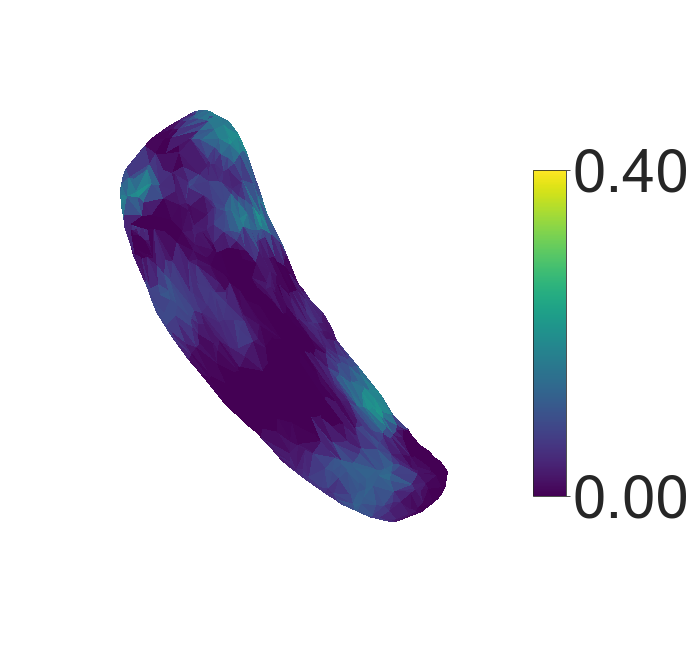

In [29]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLDG, plot_funcs.yLDG, plot_funcs.zLDG, plot_funcs.triLDG, 
                                   sorted_herit_g2_LDG, 'viridis', 0, 0.40)

#fig.savefig('../figures/FC_G2_LDG_herit.svg', dpi=300)